# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
diamonds = pd.read_csv('diamonds_clean.csv')

In [22]:
diamonds = diamonds.drop(columns="Unnamed: 0")

In [23]:
diamonds.head()

,Unnamed: 0.1,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_new,color_new,new_depths,new_depth
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43000,1,5,0,0
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31127,2,5,0,0
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31000,4,5,0,0
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63000,3,1,0,0
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75000,1,0,0,0


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [13]:
#your code here
diamonds.describe()

,Unnamed: 0.1,carat,depth,table,price,x,y,z,clarity_new,color_new,new_depths,new_depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53940.000000,53940.000000,53940.0,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.733414,3.539735,3.051020,3.405803,0.0,0.001131
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.115111,0.692051,1.647136,1.701105,0.0,0.262648
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,1.070000,0.000000,0.000000,0.0,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,2.000000,0.0,0.000000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000,0.0,0.000000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,5.000000,0.0,0.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,19.280000,8.060000,7.000000,6.000000,0.0,61.000000


In [14]:
#your comments here
"""The price varies a lot as the std shows."""

'The price varies a lot as the std shows.'

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [15]:
#your hypotheses here
"""I would say the carat, the depth, the clarity and the color would affect the price, with carat being the most important."""

'I would say the carat, the depth, the clarity and the color would affect the price, with carat being the most important.'

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [19]:
#your code here
pd.pivot_table(diamonds, index='color_new', aggfunc= 'mean')

,Unnamed: 0.1,carat,clarity_new,depth,new_depth,new_depths,price,table,x,y,z
color_new,,,,,,,,,,,
0,23538.721866,1.162137,2.776353,61.887215,0.000000,0,5323.818020,57.812393,6.519338,6.518105,4.033251
1,24951.123202,1.026927,2.964035,61.846385,0.000000,0,5091.874954,57.577278,6.222826,6.222730,3.846369
2,24586.051903,0.911799,2.933646,61.836850,0.000000,0,4486.669196,57.517811,5.983335,5.980043,3.699147
3,27725.462983,0.771190,3.463425,61.757111,0.000000,0,3999.135671,57.288629,5.677543,5.680192,3.507966
4,27624.460176,0.736538,3.133934,61.694582,0.000000,0,3724.886397,57.433536,5.614961,5.619456,3.465938
5,28791.322139,0.657867,2.969889,61.662090,0.006226,0,3076.752475,57.491201,5.411580,5.416949,3.337767
6,28119.168118,0.657795,2.691513,61.698125,0.000000,0,3169.954096,57.404590,5.417051,5.421128,3.343320


**What do you see? Pay special attention to the relationship between price and color.**

In [8]:
#your thoughts here
"""Price decreases when the color number increases, similarly for carat."""

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

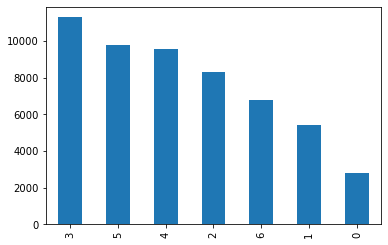

In [27]:
#your code here
fig, ax = plt.subplots()
diamonds.color_new.value_counts().plot(ax=ax, kind='bar')

In [10]:
#your comments here
"""We can see the most frequent color is 3 and the least is 0"""

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [29]:
#your code here
diamonds.groupby('carat').mean()

,Unnamed: 0.1,depth,table,price,x,y,z,clarity_new,color_new,new_depths,new_depth
carat,,,,,,,,,,,
0.20,28965.166667,61.100000,59.333333,365.166667,3.786667,3.753333,2.303333,2.833333,5.166667,0.0,0.0
0.21,34659.000000,60.511111,58.444444,380.222222,3.874444,3.837778,2.332363,2.666667,5.444444,0.0,0.0
0.22,6948.600000,61.620000,60.400000,391.400000,3.898000,3.848000,2.386000,2.600000,4.800000,0.0,0.0
0.23,35756.993174,61.426621,58.034130,486.143345,3.946382,3.973379,2.431468,4.901024,4.518771,0.0,0.0
0.24,31885.330709,61.599213,57.488189,505.185039,3.990157,4.019331,2.465591,4.972441,4.185039,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4.00,26445.000000,63.300000,58.000000,15984.000000,10.010000,9.940000,6.310000,0.000000,1.000000,0.0,0.0
4.01,25999.500000,61.750000,61.500000,15223.000000,10.080000,10.020000,6.205000,0.000000,0.500000,0.0,0.0
4.13,27131.000000,64.800000,61.000000,17329.000000,10.000000,9.850000,6.430000,0.000000,2.000000,0.0,0.0


In [28]:
pd.pivot_table(diamonds, index='carat', aggfunc= 'mean')

,Unnamed: 0.1,clarity_new,color_new,depth,new_depth,new_depths,price,table,x,y,z
carat,,,,,,,,,,,
0.20,28965.166667,2.833333,5.166667,61.100000,0.0,0,365.166667,59.333333,3.786667,3.753333,2.303333
0.21,34659.000000,2.666667,5.444444,60.511111,0.0,0,380.222222,58.444444,3.874444,3.837778,2.332363
0.22,6948.600000,2.600000,4.800000,61.620000,0.0,0,391.400000,60.400000,3.898000,3.848000,2.386000
0.23,35756.993174,4.901024,4.518771,61.426621,0.0,0,486.143345,58.034130,3.946382,3.973379,2.431468
0.24,31885.330709,4.972441,4.185039,61.599213,0.0,0,505.185039,57.488189,3.990157,4.019331,2.465591
...,...,...,...,...,...,...,...,...,...,...,...
4.00,26445.000000,0.000000,1.000000,63.300000,0.0,0,15984.000000,58.000000,10.010000,9.940000,6.310000
4.01,25999.500000,0.000000,0.500000,61.750000,0.0,0,15223.000000,61.500000,10.080000,10.020000,6.205000
4.13,27131.000000,0.000000,2.000000,64.800000,0.0,0,17329.000000,61.000000,10.000000,9.850000,6.430000


In [13]:
#your comments
"""Indeed it looks like the higher the carat, the higher the mean price"""


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

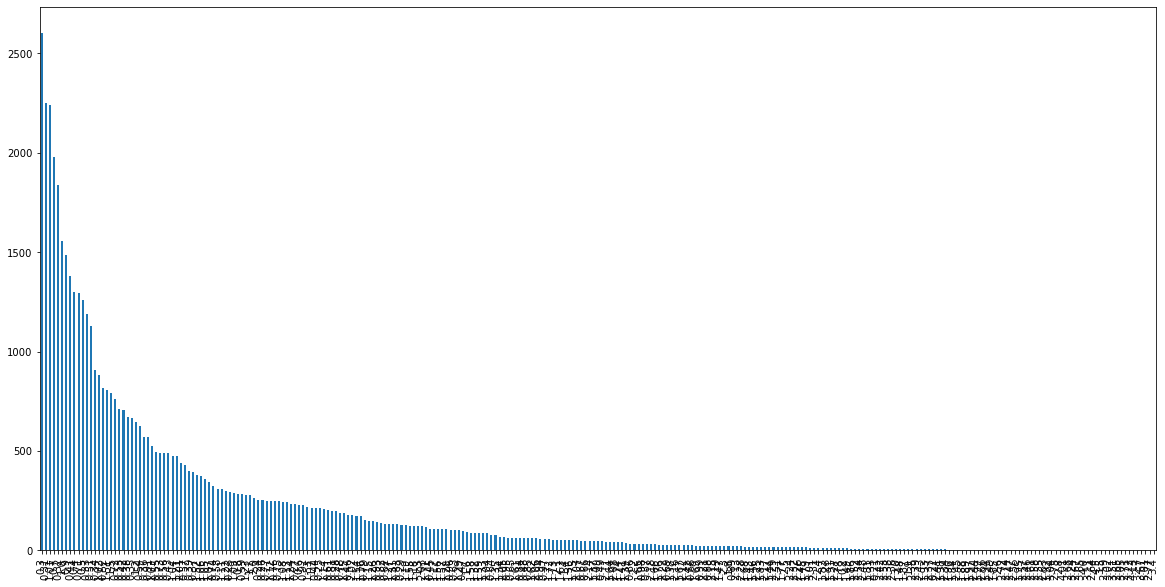

In [48]:
#your code here
fig, ax = plt.subplots()
diamonds.carat.value_counts().plot(ax=ax, kind='bar', figsize=(20,10))

(array([5.730e+02, 1.026e+03, 8.792e+03, 2.701e+03, 4.087e+03, 4.500e+02,
        3.956e+03, 2.353e+03, 9.510e+02, 2.660e+02, 4.065e+03, 1.565e+03,
        9.660e+02, 3.220e+02, 2.325e+03, 3.690e+02, 3.913e+03, 2.615e+03,
        1.461e+03, 1.025e+03, 1.477e+03, 1.002e+03, 6.090e+02, 4.540e+02,
        2.080e+02, 1.170e+02, 5.700e+01, 2.375e+03, 5.170e+02, 3.130e+02,
        1.300e+02, 4.430e+02, 1.470e+02, 7.600e+01, 2.700e+01, 3.100e+01,
        1.400e+01, 8.900e+02, 3.850e+02, 2.060e+02, 1.340e+02, 1.350e+02,
        6.200e+01, 8.300e+01, 4.500e+01, 3.900e+01, 2.500e+01, 3.200e+01,
        4.600e+01, 1.300e+01, 8.000e+00, 7.000e+00, 7.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.300e+01, 3.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+0

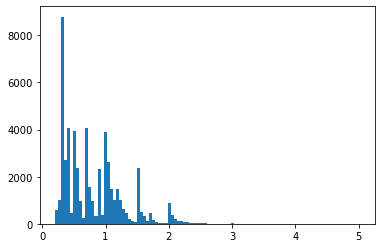

In [49]:
plt.hist(diamonds.carat, bins = 100)

In [ ]:
"""Most diamonds have a small carat value"""

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [34]:
#your code here
diamonds.groupby('table').mean()

,Unnamed: 0.1,carat,depth,price,x,y,z,clarity_new,color_new,new_depths,new_depth
table,,,,,,,,,,,
43.0,11369.00,1.0400,62.90,4997.0,6.450,6.410,4.040,4.00,1.0,0.0,0.0
44.0,35634.00,0.2900,62.80,474.0,4.200,4.240,2.650,4.00,5.0,0.0,0.0
49.0,14341.00,0.6500,64.25,2290.5,5.355,5.320,3.425,3.00,3.0,0.0,0.0
50.0,16299.50,1.5100,61.50,8995.5,7.380,7.295,4.510,2.00,3.0,0.0,0.0
50.1,3239.00,0.9400,66.00,3353.0,6.130,6.170,4.060,1.00,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
71.0,44939.00,0.6800,58.00,1633.0,5.850,5.700,3.350,2.00,3.0,0.0,0.0
73.0,51622.75,0.6025,68.90,2406.5,5.520,5.465,3.745,3.25,4.5,0.0,0.0
76.0,51343.00,0.7900,65.30,2362.0,5.520,5.130,3.350,2.00,3.0,0.0,0.0


In [18]:
#your comments here
"""Itseems the price is not correlated to the table - and no other variable is"""

**Finally, do the same with the `clarity` column.**

In [35]:
#your code here
diamonds.groupby('clarity_new').mean()

,Unnamed: 0.1,carat,depth,table,price,x,y,z,color_new,new_depths,new_depth
clarity_new,,,,,,,,,,,
0,22419.002699,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.224688,2.968961,0.0,0.000000
1,21453.988580,1.077648,61.772167,57.927181,5063.028606,6.401370,6.393516,3.952642,3.469980,0.0,0.000000
2,25585.839112,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.640636,3.448450,0.0,0.000000
3,27831.973405,0.763935,61.724417,57.417401,3924.989395,5.657709,5.658859,3.492788,3.494208,0.0,0.000000
4,27933.116510,0.727158,61.667458,57.315151,3839.455391,5.572178,5.579334,3.437924,3.161792,0.0,0.007465
5,31323.464272,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465,3.569483,0.0,0.000000
6,32402.172093,0.503321,61.624651,56.884460,2523.114637,4.960364,4.975075,3.062132,3.351573,0.0,0.000000
7,33591.562011,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659,3.101676,0.0,0.000000


In [21]:
#your comments here
"""Similarly the price does not seem to indicate a correlation per clarity."""

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [36]:
#your thoughts here
"""Overall the most important features affecting the price seem to be carat and color, meaning the other features I identified (depth and clarity) don't seem to have an impact on the price. """

"Overall the most important features affecting the price seem to be carat and color, meaning the other features I identified (depth and clarity) don't seem to have an impact on the price. "

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


C:\Users\Camille\Anaconda3\Anaconda33\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


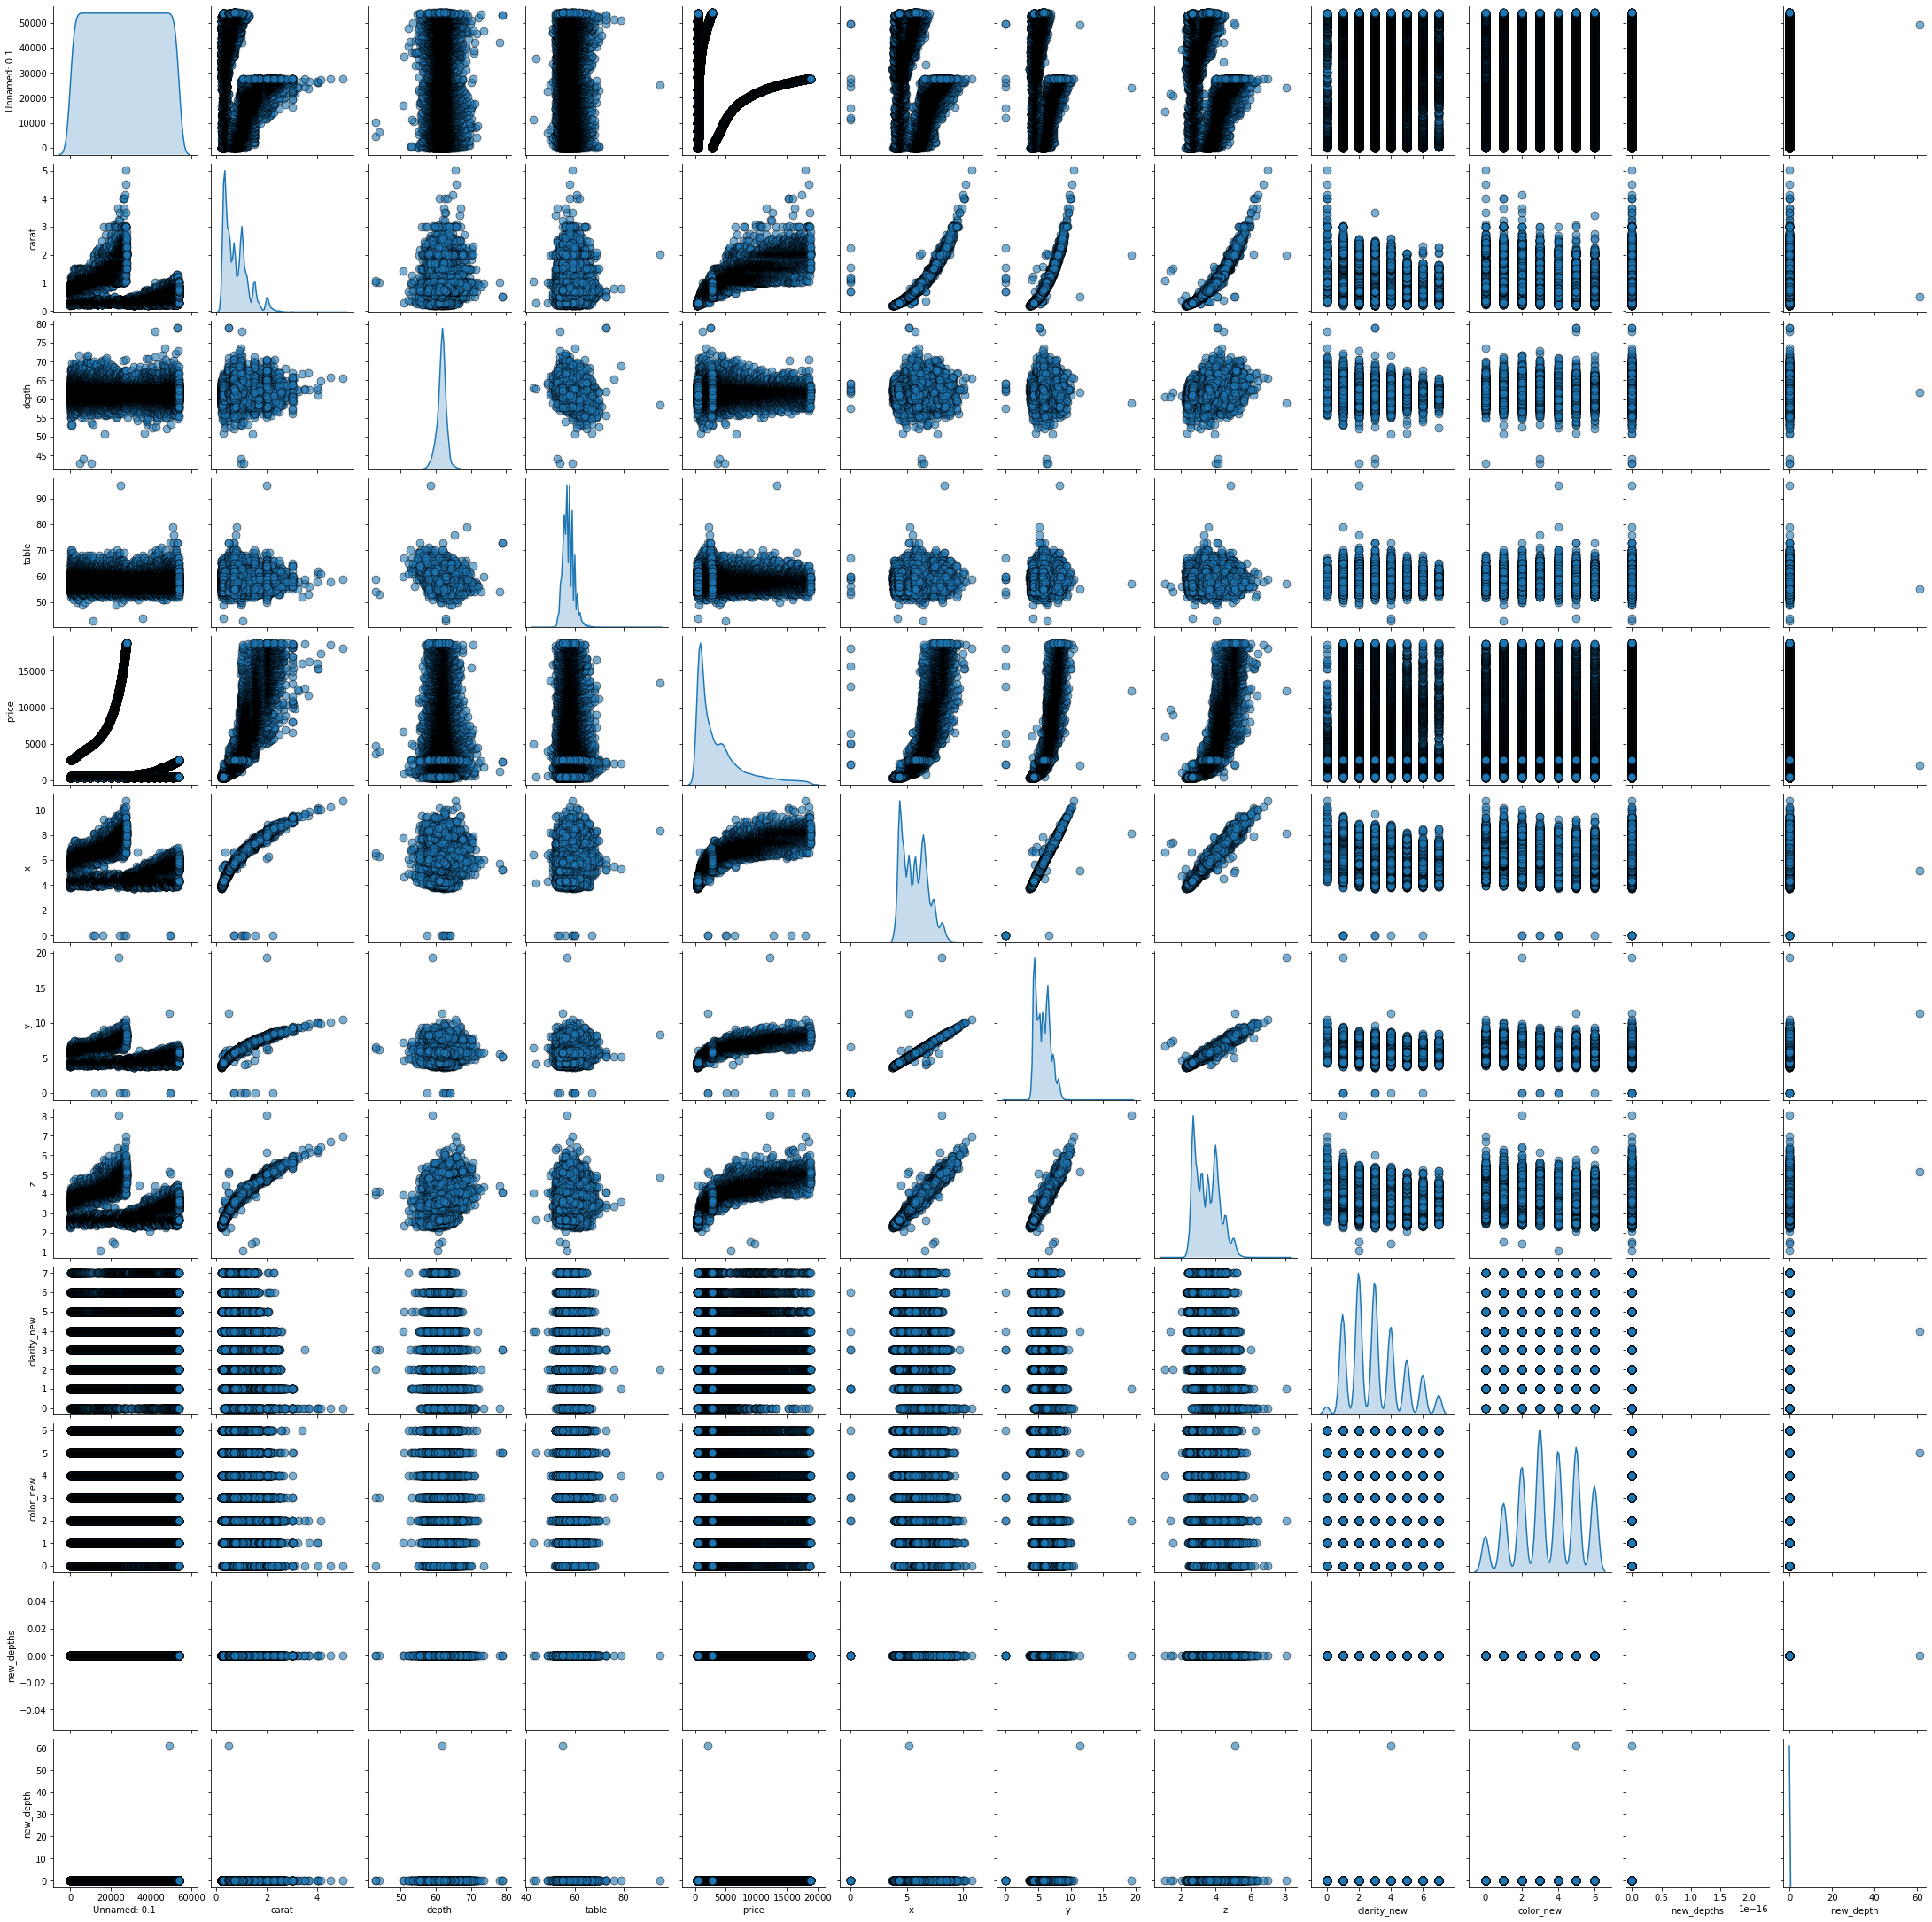

In [37]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here
"""We can identify linear relationships between x,y,z and carat"""

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

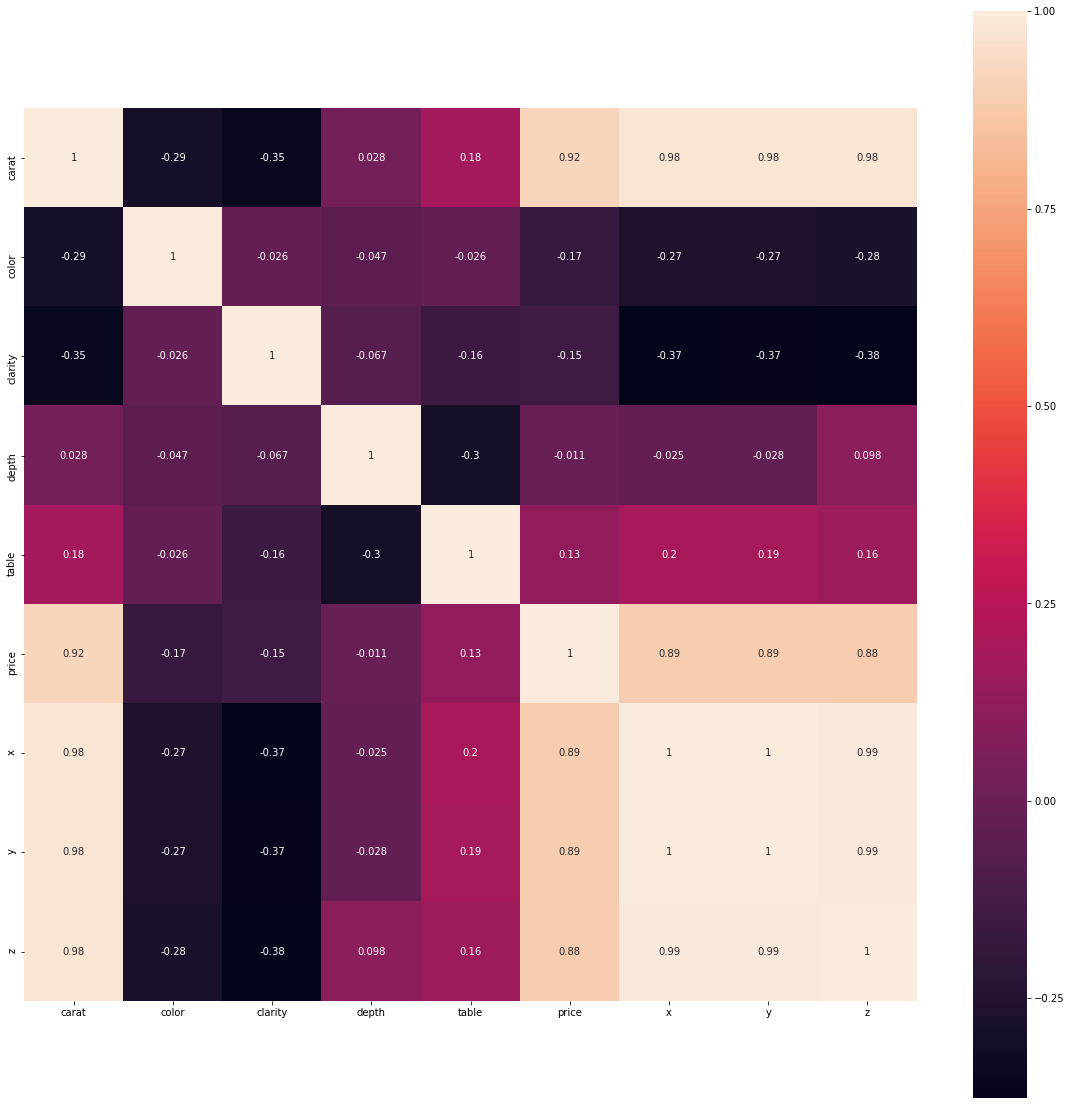

In [26]:

plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

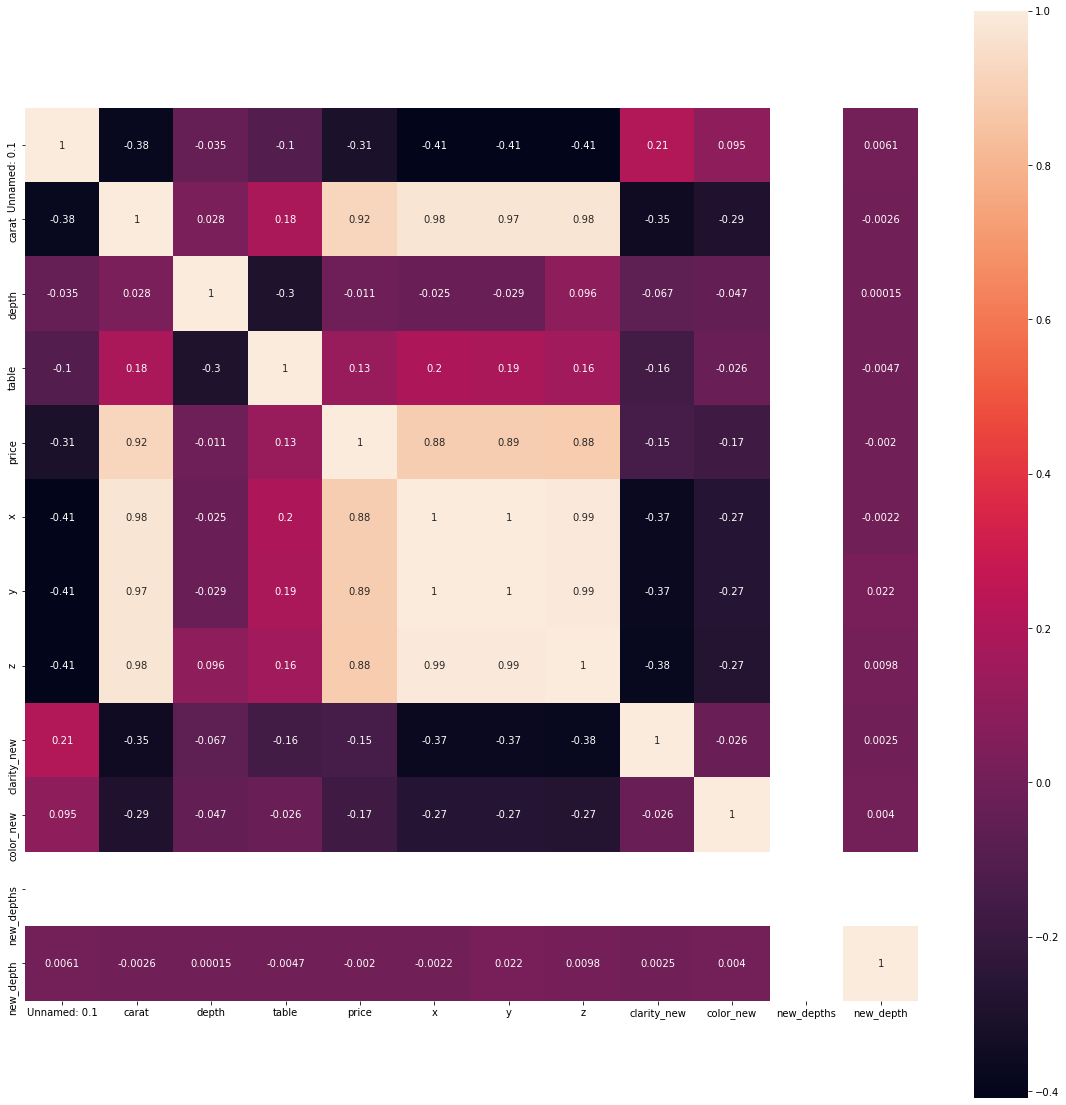

In [41]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

**What do you see here? Regarding the results before, does it fit with them?**

In [27]:
#your thoughts here
"""Carat: Carat being the weight it its strongly correlated with x,y,z (lenght,witdh, depth). As identified in the hypothesis, it is also correlated with the price.
Color: does not have any particular correlation
Clarity: does not have any particular correlation
Depth: : does not have any particular correlation
Table: : does not have any particular correlation
Price: strongly correlated with carat, hence with x,y,z
X, Y, Z: are strongly correlated together as well as with carat."""

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

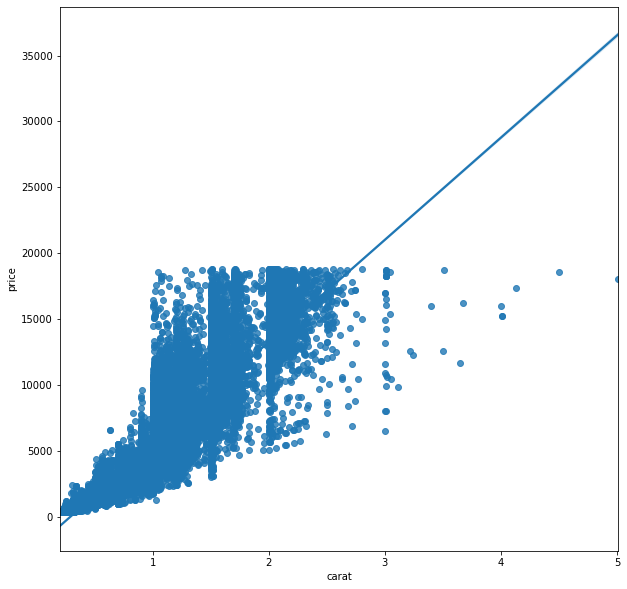

In [39]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [40]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8493305264354841

**What do you think?**

In [30]:
#your thoughts here
"""That means price has a linear correlation with the carat of the diamond"""

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here
"""It seems carat is the main determinant of the price hence no need to check any other features."""

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.